In [2]:
!pip install xlrd

In [8]:
!pip install openpyxl


In [3]:
# Імпорт необхідних бібліотек
import pandas as pd
import numpy as np

# Завантаження файлу Excel
file_path = 'C:/Users/Xena/LabsPython/En_In.xls'
energy_data = pd.read_excel(file_path, skiprows=17, usecols="C:F")

# Перейменування стовпців
energy_data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']

# Перетворення 'Energy Supply' у ГДж, заміна '...' на NaN
energy_data['Energy Supply'] = pd.to_numeric(energy_data['Energy Supply'], errors='coerce') * 1_000_000

# Очищення назв країн від цифр та тексту в дужках
energy_data['Country'] = energy_data['Country'].str.replace(r'\d+|\(.*\)', '', regex=True).str.strip()

# Перейменування вказаних країн
country_renames = {
    "Republic of Korea": "South Korea", 
    "United States of America": "United States", 
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", 
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy_data['Country'] = energy_data['Country'].replace(country_renames)

# Фільтрація для перевірки результату (American Samoa, South Korea, Bolivia)
filtered_countries = energy_data.loc[energy_data['Country'].isin(['American Samoa', 'South Korea', 'Bolivia'])]
filtered_countries


,Country,Energy Supply,Energy Supply per Capita,% Renewable
3,American Samoa,NaN,...,0.641026
24,Bolivia,3.360000e+08,32,31.477120
164,South Korea,1.100700e+10,221,2.279353


In [5]:

import pandas as pd


gdp_data = pd.read_csv('C:/Users/Xena/LabsPython/gpd.csv', skiprows=4)


country_renames = {
    "Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran", 
    "Hong Kong SAR, China": "Hong Kong"
}
gdp_data['Country Name'] = gdp_data['Country Name'].replace(country_renames)


gdp_data.head(1)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,GDP at market prices (constant 2010 US$),NY.GDP.MKTP.KD,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.467704e+09,NaN,NaN,NaN,NaN,NaN


In [10]:

import pandas as pd


scimago_data = pd.read_excel('C:/Users/Xena/LabsPython/scimagojr.xlsx')

# Вибір топ-15 країн за рангом
scimago_top15 = scimago_data[scimago_data['Rank'] <= 15]

# Завантаження даних по енергетиці та обробка даних
energy_data = pd.read_excel('C:/Users/Xena/LabsPython/En_In.xls', skiprows=17, usecols="C:F")
energy_data.columns = ['Country', 'Energy Supply', 'Energy Supply per Capita', '% Renewable']
energy_data['Energy Supply'] = pd.to_numeric(energy_data['Energy Supply'], errors='coerce') * 1_000_000
energy_data['Country'] = energy_data['Country'].str.replace(r'\d+|\(.*\)', '', regex=True).str.strip()
country_renames = {
    "Republic of Korea": "South Korea", 
    "United States of America": "United States", 
    "United Kingdom of Great Britain and Northern Ireland": "United Kingdom", 
    "China, Hong Kong Special Administrative Region": "Hong Kong"
}
energy_data['Country'] = energy_data['Country'].replace(country_renames)

# Завантаження даних по ВВП
gdp_data = pd.read_csv('C:/Users/Xena/LabsPython/gpd.csv', skiprows=4)
gdp_data.rename(columns={'Country Name': 'Country'}, inplace=True)
gdp_filtered = gdp_data[['Country', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']]

# Перейменування країн у GDP
gdp_country_renames = {
    "Korea, Rep.": "South Korea", 
    "Iran, Islamic Rep.": "Iran", 
    "Hong Kong SAR, China": "Hong Kong"
}

# Заміна назв країн у GDP із використанням .loc
gdp_filtered.loc[:, 'Country'] = gdp_filtered['Country'].replace(gdp_country_renames)



# Об'єднання даних
merged_data = scimago_top15.merge(energy_data, how='inner', on='Country')
merged_data = merged_data.merge(gdp_filtered, how='inner', on='Country')


final_columns = ['Rank', 'Documents', 'Citable documents', 'Citations', 'Self-citations', 
                 'Citations per document', 'H index', 'Energy Supply', 'Energy Supply per Capita', 
                 '% Renewable', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015']
final_data = merged_data.set_index('Country')[final_columns]

print(final_data.shape)  
final_data.head(3)       


(15, 20)


,Rank,Documents,Citable documents,Citations,Self-citations,Citations per document,H index,Energy Supply,Energy Supply per Capita,% Renewable,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
Country,,,,,,,,,,,,,,,,,,,,
China,1,127050,126767,597237,411683,4.70,138,1.271910e+11,93,19.75491,3.992331e+12,4.559041e+12,4.997775e+12,5.459247e+12,6.039659e+12,6.612490e+12,7.124978e+12,7.672448e+12,8.230121e+12,8.797999e+12
United States,2,96661,94747,792274,265436,8.20,230,9.083800e+10,286,11.57098,1.479230e+13,1.505540e+13,1.501149e+13,1.459484e+13,1.496437e+13,1.520402e+13,1.554216e+13,1.577367e+13,1.615662e+13,1.654857e+13
Japan,3,30504,30287,223024,61554,7.31,134,1.898400e+10,149,10.23282,5.496542e+12,5.617036e+12,5.558527e+12,5.251308e+12,5.498718e+12,5.473738e+12,5.569102e+12,5.644659e+12,5.642884e+12,5.669563e+12


In [11]:
# Функція для обчислення середнього ВВП за останні 10 років
def task_eight(data):
    # Обчислення середнього значення ВВП за період з 2006 по 2015 рік
    avg_gdp = data.loc[:, '2006':'2015'].mean(axis=1)
    # Сортування за спаданням
    avg_gdp_sorted = avg_gdp.sort_values(ascending=False)
    
    avg_gdp_sorted.name = 'avgGDP'
    return avg_gdp_sorted


task_eight_result = task_eight(final_data)
task_eight_result


Country
United States         1.536434e+13
China                 6.348609e+12
Japan                 5.542208e+12
Germany               3.493025e+12
France                2.681725e+12
United Kingdom        2.487907e+12
Brazil                2.189794e+12
Italy                 2.120175e+12
India                 1.769297e+12
Canada                1.660647e+12
Russian Federation    1.565459e+12
Spain                 1.418078e+12
Australia             1.164043e+12
South Korea           1.106715e+12
Iran                  4.441558e+11
Name: avgGDP, dtype: float64

In [12]:
# Функція для обчислення зміни ВВП для країни з 5-м найвищим середнім ВВП
def task_nine(data):
    # Обчислення середнього ВВП кожної країни за останні 10 років та сортування за спаданням
    avg_gdp = data.loc[:, '2006':'2015'].mean(axis=1).sort_values(ascending=False)
    # Отримання країни з 5-м найвищим середнім ВВП
    fifth_country = avg_gdp.index[4]
    # Обчислення зміни ВВП за останні 10 років для цієї країни
    gdp_change = data.loc[fifth_country, '2015'] - data.loc[fifth_country, '2006']
    return (fifth_country, gdp_change)


task_nine_result = task_nine(final_data)
task_nine_result


('France', 153345695364.24023)

In [13]:
# Функція для визначення країни з максимальним відсотком поновлюваних джерел енергії
def task_ten(data):
    # Знаходимо країну з найбільшим % Renewable
    max_renewable_country = data['% Renewable'].idxmax()
    # Отримуємо значення максимального % Renewable
    max_renewable_value = data.loc[max_renewable_country, '% Renewable']
    return (max_renewable_country, max_renewable_value)


task_ten_result = task_ten(final_data)
task_ten_result


('Brazil', 69.64803)

In [14]:
# Функція для оцінки чисельності населення та визначення шостої країни за населенням
def task_eleven(data):
    # Оцінка чисельності населення
    data['Estimated Population'] = data['Energy Supply'] / data['Energy Supply per Capita']
    # Сортування за населенням за спаданням
    sorted_population = data['Estimated Population'].sort_values(ascending=False)
    # Отримання 6-ї країни за населенням
    sixth_country = sorted_population.index[5]
    sixth_population = sorted_population.iloc[5]
    return (sixth_country, sixth_population)


task_eleven_result = task_eleven(final_data)
task_eleven_result


('Japan', 127409395.97315437)

In [15]:
# Функція для обчислення кореляції між цитованими документами на душу населення та енергопостачанням на душу населення
def task_twelve(data):
    # Оцінка чисельності населення
    data['Estimated Population'] = data['Energy Supply'] / data['Energy Supply per Capita']
    # Обчислення цитованих документів на душу населення
    data['Cited Documents per Capita'] = data['Citable documents'] / data['Estimated Population']
    # Переконуємося, що дані числові, і видаляємо пропущені значення
    data_cleaned = data[['Cited Documents per Capita', 'Energy Supply per Capita']].dropna()
    data_cleaned = data_cleaned.apply(pd.to_numeric, errors='coerce').dropna()  # Забезпечуємо числовий тип даних
    # Обчислення кореляції
    correlation = data_cleaned['Cited Documents per Capita'].corr(data_cleaned['Energy Supply per Capita'])
    return correlation

task_twelve_result = task_twelve(final_data)
task_twelve_result


0.7940010435442946

In [16]:
# Функція для створення нового стовпця на основі медіани % Renewable
def task_thirteen(data):
    # Обчислення медіани для % Renewable
    renewable_median = data['% Renewable'].median()
    # Створення нового стовпця: 1, якщо % Renewable >= медіани, інакше 0
    data['High Renewable'] = (data['% Renewable'] >= renewable_median).astype(int)
    # Повертаємо Series, відсортований за Rank у порядку зростання, індексований за назвою країни
    sorted_series = data['High Renewable'].sort_index(ascending=True)
    return sorted_series

task_thirteen_result = task_thirteen(final_data)
task_thirteen_result


Country
Australia             0
Brazil                1
Canada                1
China                 1
France                1
Germany               1
India                 0
Iran                  0
Italy                 1
Japan                 0
Russian Federation    1
South Korea           0
Spain                 1
United Kingdom        0
United States         0
Name: High Renewable, dtype: int32

In [17]:
# Функція для групування країн за континентами та обчислення статистичних показників
def task_forteen(data):
    # Словник континентів
    ContinentDict = {
        'China':'Asia', 'United States':'North America', 'Japan':'Asia',
        'United Kingdom':'Europe', 'Russian Federation':'Europe', 'Canada':'North America',
        'Germany':'Europe', 'India':'Asia', 'France':'Europe', 'South Korea':'Asia',
        'Italy':'Europe', 'Spain':'Europe', 'Iran':'Asia', 'Australia':'Australia',
        'Brazil':'South America'
    }
    
    # Оцінка чисельності населення
    data['Estimated Population'] = data['Energy Supply'] / data['Energy Supply per Capita']
    # Додавання стовпця континентів
    data['Continent'] = data.index.to_series().map(ContinentDict)
    
    # Групування за континентами та обчислення необхідних показників
    continent_stats = data.groupby('Continent')['Estimated Population'].agg(['size', 'sum', 'mean', 'std'])
    return continent_stats

task_forteen_result = task_forteen(final_data)
task_forteen_result


,size,sum,mean,std
Continent,,,,
Asia,5,2898666386.6106,579733277.32212,6.790979e+08
Australia,1,23316017.316017,23316017.316017,NaN
Europe,6,457929667.216372,76321611.202729,3.464767e+07
North America,2,352855249.48025,176427624.740125,1.996696e+08
South America,1,205915254.237288,205915254.237288,NaN


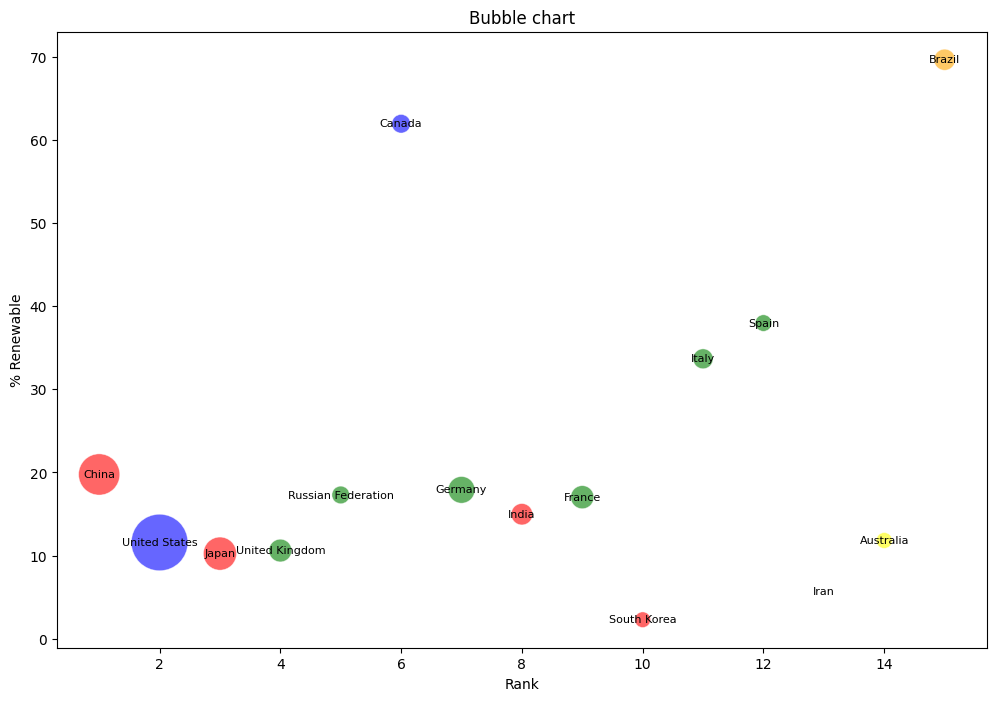

In [18]:
import matplotlib.pyplot as plt


def task_fifteen(data):
    # Визначення кольорів для континентів
    continent_colors = {
        'Asia': 'red', 'Australia': 'yellow', 'Europe': 'green', 
        'North America': 'blue', 'South America': 'orange'
    }
    
    # Мапування континентів до кольорів
    data['Color'] = data['Continent'].map(continent_colors)
    
    # Побудова бульбашкової діаграми
    plt.figure(figsize=(12, 8))
    plt.scatter(
        data['Rank'], data['% Renewable'], 
        s=data['2015'] / 1e10,  # Масштабування розміру бульбашок
        c=data['Color'], alpha=0.6, edgecolors="w", linewidth=0.5
    )
    
    # Додавання підписів для кожної бульбашки
    for i, country in enumerate(data.index):
        plt.text(data['Rank'][i], data['% Renewable'][i], country, ha='center', va='center', fontsize=8)

    # Підпис осей та заголовок
    plt.xlabel('Rank')
    plt.ylabel('% Renewable')
    plt.title('Bubble chart')
    plt.show()


task_fifteen(final_data)
